<a href="https://colab.research.google.com/github/sdivyakolu/Pytorch_Tutorial/blob/main/EMNIST_Classification_UsingDNN_DenseNuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 844.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.6/962.6 kB 41.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

In [4]:
pip install torch matplotlib numpy pandas torchvision

In [5]:
pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 15.6 MB/s eta 0:00:00


In [6]:
pip install pyngrok

In [7]:
#Run tracking UI in the background
get_ipython().system_raw("mlflow ui --port 5000 &")

#Create remote tunnel using ngrok.com to allow local port access
from pyngrok import ngrok

#Terminate open turnnels if they exists
ngrok.kill()

#Setting the authtoken ( optional)
#Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN="2yVqRPkzG1tUdthF1CtvMkgaPz2_32B4CGeeG5A1tXrnLeC4u"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

#Open an https tunnel on port 5000 for http://localhost:5000
ngrok_tunnel=ngrok.connect(addr="5000",proto="http",bind_tls=True)

print("MLFlow Tracking UI:",ngrok_tunnel.public_url)

MLFlow Tracking UI: https://37e6-34-59-186-156.ngrok-free.app


In [14]:
import mlflow
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from torch.utils.data import Dataset,DataLoader



In [16]:
from google.colab import drive

#drive.mount('/content/drive')
#drive.mount("/content/sample_data")

emnist_train_data=pd.read_csv("/content/sample_data/emnist-letters-train.csv",header=None)
emnist_test_data=pd.read_csv("/content/sample_data/emnist-letters-test.csv",header=None)
emnist_train_data.head(20)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,17,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,13,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,11,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,22,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,24,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
emnist_test_data.head(20)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
emnist_train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,12474.000000,12474.0,12474.0,12474.0,12474.0,12474.000000,12474.000000,12474.000000,12474.000000,12474.000000,...,12473.0,12473.0,12473.0,12473.0,12473.0,12473.0,12473.0,12473.0,12473.0,12473.0
mean,13.583213,0.0,0.0,0.0,0.0,0.005131,0.028620,0.026856,0.032949,0.025253,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,7.493572,0.0,0.0,0.0,0.0,0.405177,2.236494,2.146745,2.397978,2.094249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,7.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,14.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,20.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,26.000000,0.0,0.0,0.0,0.0,32.000000,183.000000,217.000000,194.000000,210.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
emnist_test_data = emnist_test_data.sample(frac=1)
emnist_test_data.head(20)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
4808,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8989,12,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10384,13,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4687,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
652,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9351,12,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6597,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11423,15,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3342,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7364,10,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
classes= ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

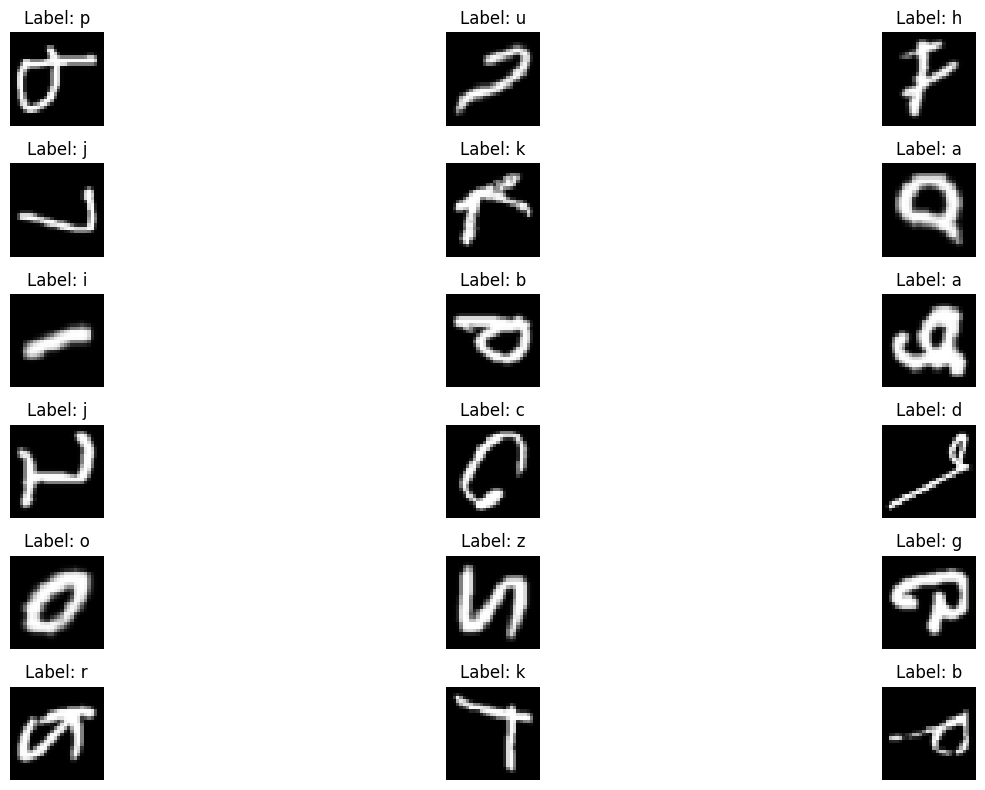

In [23]:
#Assuming first column contains the labels and rest are pixal values
train_labels=emnist_train_data.values[:,0]
train_images=emnist_train_data.values[:,1:]

#Reshape the images to ( num_samples, 28,28)
train_images=train_images.reshape(-1,28,28)

#Display a few random images
num_samples=18

random_indices=np.random.randint(0,len(train_images),num_samples)

random_indices

fig=plt.figure(figsize=(16,8))

for i,idx in enumerate(random_indices):
  plt.subplot(6,int(num_samples/6),i+1)
  plt.imshow(train_images[idx]/255.0,cmap='gray')
  plt.title(f"Label: {classes[int(train_labels[idx]-1)]}")
  plt.axis('off')

plt.tight_layout()
plt.show()

In [24]:
experiment_id=mlflow.create_experiment(name='test_experiment')
experiment_id

'147846911922881337'

In [26]:
experiment=mlflow.get_experiment(experiment_id)

print("Name:{}".format(experiment.name))
print("Experiment_id:{}".format(experiment.experiment_id))
print("Artifcat Location:{}".format(experiment.artifact_location))
print("Tags:{}".format(experiment.tags))
print("Lifecycle_stage:{}".format(experiment.lifecycle_stage))
print("Creation timestam:{}".format(experiment.creation_time))



Name:test_experiment
Experiment_id:147846911922881337
Artifcat Location:file:///content/mlruns/147846911922881337
Tags:{}
Lifecycle_stage:active
Creation timestam:1749991297358


In [28]:
mlflow.set_experiment(experiment_name='test_experiment')


<Experiment: artifact_location='file:///content/mlruns/147846911922881337', creation_time=1749991297358, experiment_id='147846911922881337', last_update_time=1749991297358, lifecycle_stage='active', name='test_experiment', tags={}>

In [30]:
mlflow.start_run()


<ActiveRun: >

In [31]:
mlflow.end_run()

In [32]:
data_info="""
the EMNIST dataset is a set of handwritten character digits derived
from the NIST special database 19 and converted to  a 28x28 pixel image format and dataset
structure that directly matches the MNIST dataset
Further information on the dataset contents and conversion process can be found in
the paper avaialbel at https://arxiv.org/abs/1702.05373v1.
"""

with open("data_info.txt","w") as f:
  f.write(data_info)

In [34]:
#STart with mlflow.start_run will automatically end_run. so, it is best practice
with mlflow.start_run(run_name='test_experiment_run') as current_run:
  mlflow.log_metric('Accuracy',0.67)
  params={
      'num_nn_layers':4
  }
  mlflow.log_params(params)
  mlflow.log_figure(fig,'sample_images.png')
  mlflow.log_artifact('data_info.txt')
  mlflow.set_tag('EMNIST','classification using DNNs')